<a href="https://colab.research.google.com/github/haenoya/AIproject/blob/main/%EC%A0%84%EA%B3%B5%ED%94%8C%EC%A0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글폰트를 설정합니다.
#1.나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#2.런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (17.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falli

In [ ]:
# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#3.matplotlib의 폰트를 Nanum 폰트로 지정합니다
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

# 더블딥 출산율의 원인규명

합계 출산율 = 유배우율 + 유배우출산율

In [ ]:
model2 = pd.read_excel('/content/유배우율_유배우출산율_모형2.xlsx')
model2

,행정구역별,년도,출생건수,합계출산율,여자인구_1549,기혼여성인구,총출생자녀수,유배우율,유배우출산율
0,전국,2000,640089,1.480,13148655,8583233,15555651,0.652784,1.812330
1,서울특별시,2000,133154,1.275,3036760,1811420,3070132,0.596498,1.694876
2,부산광역시,2000,41222,1.235,1099000,681306,1225412,0.619933,1.798622
3,대구광역시,2000,32477,1.378,740415,474277,851250,0.640556,1.794837
4,인천광역시,2000,34433,1.473,727873,501520,876288,0.689021,1.747264
...,...,...,...,...,...,...,...,...,...
82,전라북도,2020,8165,0.909,354426,168750,329255,0.476122,1.951141
83,전라남도,2020,9738,1.145,313463,162847,321854,0.519509,1.976420
84,경상북도,2020,12873,1.003,484862,248787,448712,0.513109,1.803599
85,경상남도,2020,16823,0.945,667563,356912,642427,0.534649,1.799959


In [ ]:
model2.columns

Index(['행정구역별', '년도', '출생건수', '합계출산율', '여자인구_1549', '기혼여성인구', '총출생자녀수', '유배우율',
       '유배우출산율'],
      dtype='object')

In [ ]:
formula = '출생건수 ~ 합계출산율 + 유배우율 + 유배우출산율 '
result = smf.ols(formula, model2).fit()
result.summary()
# 왜이렇게 낮지?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   출생건수   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.220
Date:                Wed, 11 May 2022   Prob (F-statistic):              0.308
Time:                        11:56:55   Log-Likelihood:                -1128.9
No. Observations:                  87   AIC:                             2266.
Df Residuals:                      83   BIC:                             2276.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.682e+05   2.04e+05      1.809      0.074   -3.66e+04    7.73e+05
합계출산율       4.236e+04   6.71e+04      0.631      0.530   -9.12e+04    1.76e+05
유배우율       -4302.8903   1.91e+05     -0.023      0.982   -3.84e+05    3.76e+05
유배우출산율     -1.967e+05   1.08e+05     -1.820      0.072   -4.12e+05    1.82e+04
==============================================================================
Omnibus:                       97.192   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              964.145
Skew:                           3.769   Prob(JB):                    4.35e-210
Kurtosis:                      17.462   Cond. No.                         58.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
formula = '합계출산율 ~ 유배우율 + 유배우출산율  '
result = smf.ols(formula, model2).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  합계출산율   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     55.54
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.28e-16
Time:                        11:56:55   Log-Likelihood:                 30.304
No. Observations:                  87   AIC:                            -54.61
Df Residuals:                      84   BIC:                            -47.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5111      0.287     -5.270      0.000      -2.081      -0.941
유배우율           1.8037      0.240      7.506      0.000       1.326       2.282
유배우출산율         0.9291      0.143      6.481      0.000       0.644       1.214
==============================================================================
Omnibus:                       16.093   Durbin-Watson:                   0.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.249
Skew:                           0.782   Prob(JB):                     5.42e-06
Kurtosis:                       5.061   Cond. No.                         38.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 출산율 예측모형을 이용한 한국의 출산력 시나리오 분석

In [ ]:
model3 = pd.read_excel('/content/순위별출산율모형.xlsx')
model3

,행정구역별,년도,출생건수,합계출산율,여자인구_1549,기혼여성인구,총출생자녀수,출생자녀1,출생자녀2,출생자녀3,c1,c2,c3,c2/c1,c3/c2
0,전국,2000,640089,1.480,13148655,8583233,15555651,3927831,10538238,3332682,0.457617,1.227770,0.388278,2.682966,0.316247
1,서울특별시,2000,133154,1.275,3036760,1811420,3070132,929359,2295486,633324,0.513056,1.267230,0.349628,2.469967,0.275900
2,부산광역시,2000,41222,1.235,1099000,681306,1225412,318005,890520,272559,0.466758,1.307078,0.400054,2.800333,0.306067
3,대구광역시,2000,32477,1.378,740415,474277,851250,218749,610038,176489,0.461226,1.286248,0.372122,2.788758,0.289308
4,인천광역시,2000,34433,1.473,727873,501520,876288,246008,636958,152173,0.490525,1.270055,0.303424,2.589176,0.238906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,전라북도,2020,8165,0.909,354426,168750,329255,49057,95009,25193,0.290708,0.563016,0.149292,1.936706,0.265164
83,전라남도,2020,9738,1.145,313463,162847,321854,46227,89127,26773,0.283868,0.547305,0.164406,1.928029,0.300392
84,경상북도,2020,12873,1.003,484862,248787,448712,79988,137708,26914,0.321512,0.553518,0.108181,1.721608,0.195443
85,경상남도,2020,16823,0.945,667563,356912,642427,109950,200937,38385,0.308059,0.562988,0.107548,1.827531,0.191030


In [ ]:
model3.columns

Index(['행정구역별', '년도', '출생건수', '합계출산율', '여자인구_1549', '기혼여성인구', '총출생자녀수',
       '출생자녀1', '출생자녀2', '출생자녀3', 'c1', 'c2', 'c3', 'c2/c1', 'c3/c2'],
      dtype='object')

In [ ]:
formula = '합계출산율 ~ c1 + c2 + c3 '
result = smf.ols(formula, model3).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  합계출산율   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     29.35
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.95e-13
Time:                        11:56:55   Log-Likelihood:                 25.105
No. Observations:                  87   AIC:                            -42.21
Df Residuals:                      83   BIC:                            -32.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1487      0.083     13.795      0.000       0.983       1.314
c1            -1.4877      0.404     -3.680      0.000      -2.292      -0.684
c2             0.5353      0.214      2.506      0.014       0.110       0.960
c3             0.9635      0.322      2.991      0.004       0.323       1.604
==============================================================================
Omnibus:                       16.143   Durbin-Watson:                   0.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.467
Skew:                           0.803   Prob(JB):                     8.02e-06
Kurtosis:                       4.973   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
formula = '출생건수 ~ c1 + c2 + c3 '
result = smf.ols(formula, model3).fit()
result.summary()
# 출생건수를 예측하는 건 항상 설명력이 낮다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   출생건수   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.620
Date:                Wed, 11 May 2022   Prob (F-statistic):              0.191
Time:                        11:56:55   Log-Likelihood:                -1128.3
No. Observations:                  87   AIC:                             2265.
Df Residuals:                      83   BIC:                             2274.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.447e+04   4.76e+04     -0.933      0.353   -1.39e+05    5.03e+04
c1          1.795e+05   2.31e+05      0.776      0.440   -2.81e+05     6.4e+05
c2           1.31e+05   1.22e+05      1.072      0.287   -1.12e+05    3.74e+05
c3          -2.71e+05   1.84e+05     -1.470      0.145   -6.38e+05    9.56e+04
==============================================================================
Omnibus:                       94.651   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.501
Skew:                           3.675   Prob(JB):                    5.13e-188
Kurtosis:                      16.562   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
formula = '합계출산율 ~ c1 + c2/c1 + c3/c2 '
result = smf.ols(formula, model3).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  합계출산율   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     25.76
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.82e-15
Time:                        11:56:56   Log-Likelihood:                 35.052
No. Observations:                  87   AIC:                            -58.10
Df Residuals:                      81   BIC:                            -43.31
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4682      0.672     -2.186      0.032      -2.804      -0.132
c1             2.2325      1.271      1.756      0.083      -0.297       4.762
c2             3.9420      0.975      4.044      0.000       2.002       5.882
c2:c1         -4.1529      1.700     -2.444      0.017      -7.534      -0.771
c3             7.6068      1.527      4.982      0.000       4.569      10.645
c3:c2         -7.4155      1.646     -4.504      0.000     -10.691      -4.140
==============================================================================
Omnibus:                       45.376   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.284
Skew:                           1.558   Prob(JB):                     3.23e-44
Kurtosis:                       9.749   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
formula = '출생건수 ~ c1 + c2/c1 + c3/c2 '
result = smf.ols(formula, model3).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   출생건수   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.179
Date:                Wed, 11 May 2022   Prob (F-statistic):              0.327
Time:                        11:56:56   Log-Likelihood:                -1127.7
No. Observations:                  87   AIC:                             2267.
Df Residuals:                      81   BIC:                             2282.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.967e+05   4.28e+05      0.927      0.357   -4.55e+05    1.25e+06
c1         -5.633e+05    8.1e+05     -0.695      0.489   -2.18e+06    1.05e+06
c2         -4.854e+05   6.21e+05     -0.781      0.437   -1.72e+06    7.51e+05
c2:c1       9.466e+05   1.08e+06      0.874      0.385   -1.21e+06     3.1e+06
c3         -1.055e+06   9.73e+05     -1.084      0.282   -2.99e+06    8.82e+05
c3:c2        9.12e+05   1.05e+06      0.869      0.387   -1.18e+06       3e+06
==============================================================================
Omnibus:                       94.563   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              859.548
Skew:                           3.671   Prob(JB):                    2.25e-187
Kurtosis:                      16.535   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 우리나라 저출산의 원인과 경제적 영향

## 유배우율, 기혼여성인구, 총출생자녀수 - 종사상지위

모형 오류

In [ ]:
model4 = pd.read_excel('/content/종사상지위_유배우_모형.xlsx')
model4

,행정구역별(시군구),년도,성별,혼인상태별,취업인구(15세 이상)-합계,임금근로자,무급가족종사자,자영업자,고용원이없는자영업자,고용원이있는자영업자
0,전국,2020,합계,미혼,7302507,6425211,157729,719567,536595,182972
1,전국,2020,합계,배우자 있음,16131975,11736660,680039,3715276,2698006,1017270
2,전국,2020,남자,미혼,4195257,3641449,96287,457521,338770,118751
3,전국,2020,남자,배우자 있음,9651516,6933938,139130,2578448,1865815,712633
4,전국,2020,여자,미혼,3107250,2783762,61442,262046,197825,64221
...,...,...,...,...,...,...,...,...,...,...
511,제주특별자치도,2000,합계,배우자 있음,169840,74822,29382,65636,53231,12405
512,제주특별자치도,2000,남자,미혼,22906,18537,2243,2126,1587,539
513,제주특별자치도,2000,남자,배우자 있음,101753,49738,1057,50958,41309,9649
514,제주특별자치도,2000,여자,미혼,19547,17841,691,1015,650,365


In [ ]:
model2.columns

Index(['행정구역별', '년도', '출생건수', '합계출산율', '여자인구_1549', '기혼여성인구', '총출생자녀수', '유배우율',
       '유배우출산율'],
      dtype='object')

In [ ]:
# merge 후 종사상지위 비율 추가
model4_merge = pd.merge(model4,model2, left_on = ['행정구역별(시군구)', '년도'], right_on = ['행정구역별', '년도'])
model4_merge.columns
model4_merge['임금근로자비율'] = model4_merge['임금근로자']/model4_merge['취업인구(15세 이상)-합계']
model4_merge['무급가족종사자비율'] = model4_merge['무급가족종사자']/model4_merge['취업인구(15세 이상)-합계']
model4_merge['자영업자비율'] = model4_merge['자영업자']/model4_merge['취업인구(15세 이상)-합계']


In [ ]:
model4_total = model4_merge[model4_merge['성별'] == '합계']
model4_total.head()

,행정구역별(시군구),년도,성별,혼인상태별,취업인구(15세 이상)-합계,임금근로자,무급가족종사자,자영업자,고용원이없는자영업자,고용원이있는자영업자,...,출생건수,합계출산율,여자인구_1549,기혼여성인구,총출생자녀수,유배우율,유배우출산율,임금근로자비율,무급가족종사자비율,자영업자비율
0,전국,2020,합계,미혼,7302507,6425211,157729,719567,536595,182972,...,272337,0.837,11421060,5381912,9202359,0.471227,1.709868,0.879864,0.021599,0.098537
1,전국,2020,합계,배우자 있음,16131975,11736660,680039,3715276,2698006,1017270,...,272337,0.837,11421060,5381912,9202359,0.471227,1.709868,0.727540,0.042155,0.230305
6,서울특별시,2020,합계,미혼,1784545,1581189,25139,178217,128836,49381,...,47445,0.642,2358675,918189,1394425,0.389282,1.518669,0.886046,0.014087,0.099867
7,서울특별시,2020,합계,배우자 있음,2748358,2123059,61764,563535,362675,200860,...,47445,0.642,2358675,918189,1394425,0.389282,1.518669,0.772483,0.022473,0.205044
12,부산광역시,2020,합계,미혼,454566,398485,8216,47865,35340,12525,...,15058,0.747,712511,311442,526804,0.437105,1.691500,0.876627,0.018074,0.105298


In [ ]:
# 종사상지위가 기혼여성인구에 영향을 미치는 지 확인
formula = '기혼여성인구 ~ 임금근로자 + 무급가족종사자 + 자영업자'
result = smf.ols(formula, model4_total).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 기혼여성인구   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     327.4
Date:                Wed, 11 May 2022   Prob (F-statistic):           6.42e-70
Time:                        12:18:12   Log-Likelihood:                -2539.9
No. Observations:                 172   AIC:                             5088.
Df Residuals:                     168   BIC:                             5100.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     6.5e+04    5.4e+04      1.203      0.231   -4.17e+04    1.72e+05
임금근로자          1.3662      0.072     18.892      0.000       1.223       1.509
무급가족종사자       10.6643      1.064     10.027      0.000       8.565      12.764
자영업자          -4.1558      0.389    -10.692      0.000      -4.923      -3.388
==============================================================================
Omnibus:                       95.014   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1560.281
Skew:                           1.584   Prob(JB):                         0.00
Kurtosis:                      17.411   Cond. No.                     2.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 종사상지위가 총출생자녀수에 영향을 미치는 지 확인
formula = '총출생자녀수 ~ 임금근로자 + 무급가족종사자 + 자영업자'
result = smf.ols(formula, model4_total).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 총출생자녀수   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     336.3
Date:                Wed, 11 May 2022   Prob (F-statistic):           9.25e-71
Time:                        12:28:59   Log-Likelihood:                -2639.1
No. Observations:                 172   AIC:                             5286.
Df Residuals:                     168   BIC:                             5299.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.198e+05   9.62e+04      1.245      0.215   -7.02e+04     3.1e+05
임금근로자          2.4648      0.129     19.143      0.000       2.211       2.719
무급가족종사자       20.2161      1.894     10.675      0.000      16.478      23.955
자영업자          -7.7578      0.692    -11.210      0.000      -9.124      -6.392
==============================================================================
Omnibus:                       87.322   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1457.789
Skew:                           1.388   Prob(JB):                         0.00
Kurtosis:                      16.989   Cond. No.                     2.32e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 종사상지위비율이 합계출산율에 영향을 미치는 지 확인
formula = '합계출산율 ~ 임금근로자비율 + 무급가족종사자비율 + 자영업자비율'
result = smf.ols(formula, model4_total).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  합계출산율   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     20.62
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.99e-11
Time:                        12:27:00   Log-Likelihood:                 13.431
No. Observations:                 172   AIC:                            -18.86
Df Residuals:                     168   BIC:                            -6.272
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -517.9115    460.072     -1.126      0.262   -1426.178     390.355
임금근로자비율      519.1498    460.082      1.128      0.261    -389.138    1427.437
무급가족종사자비율    523.0403    460.104      1.137      0.257    -385.290    1431.371
자영업자비율       518.0141    460.051      1.126      0.262    -390.212    1426.240
==============================================================================
Omnibus:                        0.844   Durbin-Watson:                   0.311
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.809
Skew:                           0.165   Prob(JB):                        0.667
Kurtosis:                       2.941   Cond. No.                     6.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 종사상지위비율이 유배우율에 영향을 미치는 지 확인
formula = '유배우율 ~ 임금근로자비율 + 무급가족종사자비율 + 자영업자비율'
result = smf.ols(formula, model4_total).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   유배우율   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     30.14
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.21e-15
Time:                        12:24:44   Log-Likelihood:                 230.68
No. Observations:                 172   AIC:                            -453.4
Df Residuals:                     168   BIC:                            -440.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    678.1410    130.102      5.212      0.000     421.296     934.986
임금근로자비율     -677.5930    130.105     -5.208      0.000    -934.444    -420.742
무급가족종사자비율   -676.5078    130.111     -5.199      0.000    -933.371    -419.645
자영업자비율      -677.8642    130.096     -5.210      0.000    -934.698    -421.031
==============================================================================
Omnibus:                        8.887   Durbin-Watson:                   0.501
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.448
Skew:                           0.566   Prob(JB):                      0.00888
Kurtosis:                       2.813   Cond. No.                     6.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 성별에 따라 다른 영향을 미치는 지 확인
model4_sex = model4_merge[model4_merge['성별'] != '합계']
model4_sex.head()

,행정구역별(시군구),년도,성별,혼인상태별,취업인구(15세 이상)-합계,임금근로자,무급가족종사자,자영업자,고용원이없는자영업자,고용원이있는자영업자,...,출생건수,합계출산율,여자인구_1549,기혼여성인구,총출생자녀수,유배우율,유배우출산율,임금근로자비율,무급가족종사자비율,자영업자비율
2,전국,2020,남자,미혼,4195257,3641449,96287,457521,338770,118751,...,272337,0.837,11421060,5381912,9202359,0.471227,1.709868,0.867992,0.022951,0.109057
3,전국,2020,남자,배우자 있음,9651516,6933938,139130,2578448,1865815,712633,...,272337,0.837,11421060,5381912,9202359,0.471227,1.709868,0.718430,0.014415,0.267155
4,전국,2020,여자,미혼,3107250,2783762,61442,262046,197825,64221,...,272337,0.837,11421060,5381912,9202359,0.471227,1.709868,0.895893,0.019774,0.084334
5,전국,2020,여자,배우자 있음,6480459,4802722,540909,1136828,832191,304637,...,272337,0.837,11421060,5381912,9202359,0.471227,1.709868,0.741108,0.083468,0.175424
8,서울특별시,2020,남자,미혼,903124,787238,13510,102376,72744,29632,...,47445,0.642,2358675,918189,1394425,0.389282,1.518669,0.871683,0.014959,0.113358


In [ ]:
# 종사상지위가 기혼여성인구에 영향을 미치는 지 확인
formula = '기혼여성인구 ~ 임금근로자 + 무급가족종사자 + 자영업자 + 성별'
result = smf.ols(formula, model4_sex).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 기혼여성인구   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     295.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.26e-109
Time:                        12:25:23   Log-Likelihood:                -5152.5
No. Observations:                 344   AIC:                         1.032e+04
Df Residuals:                     339   BIC:                         1.033e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.265e+05   6.42e+04      1.968      0.050      78.922    2.53e+05
성별[T.여자]    1.277e+04   8.84e+04      0.144      0.885   -1.61e+05    1.87e+05
임금근로자          2.0112      0.106     19.030      0.000       1.803       2.219
무급가족종사자        2.3989      0.379      6.336      0.000       1.654       3.144
자영업자          -1.6370      0.224     -7.314      0.000      -2.077      -1.197
==============================================================================
Omnibus:                      232.664   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8131.039
Skew:                           2.259   Prob(JB):                         0.00
Kurtosis:                      26.385   Cond. No.                     2.60e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 종사상지위비율이 유배우율에 영향을 미치는 지 확인
formula = '유배우율 ~ 임금근로자비율 + 무급가족종사자비율 + 자영업자비율 + 성별'
result = smf.ols(formula, model4_sex).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   유배우율   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     16.11
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.32e-12
Time:                        12:27:32   Log-Likelihood:                 417.22
No. Observations:                 344   AIC:                            -824.4
Df Residuals:                     339   BIC:                            -805.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    528.8461     91.685      5.768      0.000     348.503     709.190
성별[T.여자]      -0.0127      0.010     -1.291      0.197      -0.032       0.007
임금근로자비율     -528.2992     91.688     -5.762      0.000    -708.648    -347.951
무급가족종사자비율   -528.0867     91.687     -5.760      0.000    -708.434    -347.739
자영업자비율      -528.2554     91.683     -5.762      0.000    -708.595    -347.916
==============================================================================
Omnibus:                       18.087   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.665
Skew:                           0.273   Prob(JB):                      0.00483
Kurtosis:                       2.332   Cond. No.                     6.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

성별 구분 별로 영향력X

## 합계출산율, 총출생건수, 출생건수 - 여성의고용형태

In [ ]:
model6 = pd.read_excel('/content/여성의고용형태_출산율_모형.xlsx')
model6.head()

,년도,행정구역별(시도),임금근로자,무급가족종사자,자영업자
0,2020,강원도,248683,30671,60794
1,2020,경기도,2347504,107945,408759
2,2020,경상남도,498193,61232,124080
3,2020,경상북도,354022,74943,103021
4,2020,광주광역시,248890,11893,47987


In [ ]:
model6.shape

(87, 5)

In [ ]:
model6.columns

Index(['년도', '행정구역별(시도)', '임금근로자', '무급가족종사자', '자영업자'], dtype='object')

In [ ]:
model6['행정구역별(시도)'] 

0         강원도
1         경기도
2        경상남도
3        경상북도
4       광주광역시
       ...   
82       전라남도
83       전라북도
84    제주특별자치도
85       충청남도
86       충청북도
Name: 행정구역별(시도), Length: 87, dtype: object

In [ ]:
model3['행정구역별']

0          전국
1       서울특별시
2       부산광역시
3       대구광역시
4       인천광역시
       ...   
82       전라북도
83       전라남도
84       경상북도
85       경상남도
86    제주특별자치도
Name: 행정구역별, Length: 87, dtype: object

In [ ]:
model6_merge = model3.merge(model6, left_on = ['행정구역별', '년도'], right_on = ['행정구역별(시도)', '년도'])
model6_merge.shape

(87, 19)

In [ ]:
model6_merge.columns

Index(['행정구역별', '년도', '출생건수', '합계출산율', '여자인구_1549', '기혼여성인구', '총출생자녀수',
       '출생자녀1', '출생자녀2', '출생자녀3', 'c1', 'c2', 'c3', 'c2/c1', 'c3/c2',
       '행정구역별(시도)', '임금근로자', '무급가족종사자', '자영업자'],
      dtype='object')

In [ ]:
formula = '출생건수 ~ 임금근로자 + 무급가족종사자 + 자영업자'
result = smf.ols(formula, model6_merge).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   출생건수   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     533.1
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.17e-54
Time:                        12:30:11   Log-Likelihood:                -999.86
No. Observations:                  87   AIC:                             2008.
Df Residuals:                      83   BIC:                             2018.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -795.3099   2925.675     -0.272      0.786   -6614.359    5023.739
임금근로자          0.0045      0.005      0.910      0.365      -0.005       0.014
무급가족종사자        0.3401      0.018     19.149      0.000       0.305       0.375
자영업자           0.0473      0.020      2.416      0.018       0.008       0.086
==============================================================================
Omnibus:                       16.340   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.821
Skew:                           0.732   Prob(JB):                     9.09e-07
Kurtosis:                       5.351   Cond. No.                     1.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
formula = '합계출산율 ~ 임금근로자 + 무급가족종사자 + 자영업자'
result = smf.ols(formula, model6_merge).fit()
result.summary()
# 변수변환하면 괜찮지 않을까?

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  합계출산율   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     7.794
Date:                Wed, 11 May 2022   Prob (F-statistic):           0.000120
Time:                        12:30:12   Log-Likelihood:                 4.4493
No. Observations:                  87   AIC:                           -0.8986
Df Residuals:                      83   BIC:                             8.965
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2644      0.028     44.571      0.000       1.208       1.321
임금근로자      -2.176e-07   4.83e-08     -4.504      0.000   -3.14e-07   -1.22e-07
무급가족종사자     5.877e-07   1.72e-07      3.413      0.001    2.45e-07     9.3e-07
자영업자        4.837e-07    1.9e-07      2.545      0.013    1.06e-07    8.62e-07
==============================================================================
Omnibus:                        0.411   Durbin-Watson:                   0.481
Prob(Omnibus):                  0.814   Jarque-Bera (JB):                0.570
Skew:                           0.051   Prob(JB):                        0.752
Kurtosis:                       2.617   Cond. No.                     1.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
formula = '총출생자녀수 ~ 임금근로자 + 무급가족종사자 + 자영업자'
result = smf.ols(formula, model6_merge).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 총출생자녀수   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1145.
Date:                Wed, 11 May 2022   Prob (F-statistic):           2.12e-67
Time:                        12:30:18   Log-Likelihood:                -1256.2
No. Observations:                  87   AIC:                             2520.
Df Residuals:                      83   BIC:                             2530.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.422e+04   5.57e+04     -0.255      0.799   -1.25e+05    9.66e+04
임금근로자          0.7434      0.095      7.835      0.000       0.555       0.932
무급가족종사자        8.7870      0.338     25.985      0.000       8.114       9.460
자영업자          -1.0293      0.373     -2.758      0.007      -1.772      -0.287
==============================================================================
Omnibus:                       10.210   Durbin-Watson:                   0.969
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.081
Skew:                           0.596   Prob(JB):                      0.00238
Kurtosis:                       4.383   Cond. No.                     1.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 저출산과 인구 이동으로 인한 지역인구 변화

## 직업분류별 취업인구 - 인구성장잠재력 지수

In [ ]:
job = pd.read_csv('/content/년도별_행정구역별_직업_소분류별_ 취업인구.csv', encoding = 'cp949')
job

,시점,항목,성별,계,관리자,전문가및관련종사자,사무종사자,서비스종사자,판매종사자,농림/어업숙련종사자,기능원및관련기능종사자,장치/기계조작및조립종사자,단순노무종사자,기타
0,2020,전국,합계,25839568,208675,5135719,5230734,3260231,2901264,1101098,2322445,3135596,2428865,114941
1,2020,전국,남자,14755802,160678,2631027,2749669,1118225,1452961,672979,1949973,2576062,1338035,106193
2,2020,전국,여자,11083766,47997,2504692,2481065,2142006,1448303,428119,372472,559534,1090830,8748
3,2020,서울특별시,합계,4922176,43390,1278200,1288948,596333,637653,8334,375483,267304,419370,7161
4,2020,서울특별시,남자,2679464,34058,673817,635316,227990,329661,5985,293130,237880,235067,6560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2000,경상남도,남자,756192,48358,92487,79035,38178,58504,150891,104143,126546,50651,7376
251,2000,경상남도,여자,488499,3790,57830,57809,72264,70506,146283,15747,30327,33842,80
252,2000,제주특별자치도,합계,232449,6809,27717,26483,26942,26223,68500,16378,16465,16799,133
253,2000,제주특별자치도,남자,129046,6288,16047,13083,8849,10632,34190,14477,15641,9706,133


In [ ]:
pop = pd.read_csv('/content/인구성장잠재력지수.csv', encoding = 'cp949')
pop

,년도,행정구역별(읍면동),65세이상총인구,2039여성,인구성장잠재력지수
0,2010,전국,5424667,7034058,1.296680
1,2010,서울특별시,928956,1652207,1.778563
2,2010,부산광역시,397130,478247,1.204258
3,2010,대구광역시,251516,348479,1.385514
4,2010,인천광역시,232199,397811,1.713233
...,...,...,...,...,...
80,2000,전라북도,211579,279706,1.321993
81,2000,전라남도,270708,261679,0.966647
82,2000,경상북도,314068,407589,1.297773
83,2000,경상남도,267459,479998,1.794660


In [ ]:
pop['행정구역별(읍면동)'].value_counts()

전국         5
강원도        5
경상남도       5
경상북도       5
전라남도       5
전라북도       5
충청남도       5
충청북도       5
경기도        5
서울특별시      5
울산광역시      5
대전광역시      5
광주광역시      5
인천광역시      5
대구광역시      5
부산광역시      5
제주특별자치도    5
Name: 행정구역별(읍면동), dtype: int64

In [ ]:
job['항목'].value_counts()

전국         15
강원도        15
경상남도       15
경상북도       15
전라남도       15
전라북도       15
충청남도       15
충청북도       15
경기도        15
서울특별시      15
울산광역시      15
대전광역시      15
광주광역시      15
인천광역시      15
대구광역시      15
부산광역시      15
제주특별자치도    15
Name: 항목, dtype: int64

In [ ]:
job_pop = pd.merge(pop, job, left_on = ['년도', '행정구역별(읍면동)'], right_on = ['시점', '항목'])
job_pop.drop(['시점', '항목'], axis = 1, inplace = True)
job_pop

,년도,행정구역별(읍면동),65세이상총인구,2039여성,인구성장잠재력지수,성별,계,관리자,전문가및관련종사자,사무종사자,서비스종사자,판매종사자,농림/어업숙련종사자,기능원및관련기능종사자,장치/기계조작및조립종사자,단순노무종사자,기타
0,2010,전국,5424667,7034058,1.296680,합계,22200398,624124,4305234,3607845,2209667,2697442,1675586,1959586,2707684,2328485,79433
1,2010,전국,5424667,7034058,1.296680,남자,12845507,529012,2309713,1991404,735003,1320983,886482,1611442,2219242,1161618,77029
2,2010,전국,5424667,7034058,1.296680,여자,9354891,95112,1995521,1616441,1474664,1376459,789104,348144,488442,1166867,2404
3,2010,서울특별시,928956,1652207,1.778563,합계,4609336,192621,1166525,929604,480995,658545,11299,388647,303590,467694,7631
4,2010,서울특별시,928956,1652207,1.778563,남자,2604098,160862,641540,477758,169336,339695,8188,290429,268160,239440,7243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2000,경상남도,267459,479998,1.794660,남자,756192,48358,92487,79035,38178,58504,150891,104143,126546,50651,7376
251,2000,경상남도,267459,479998,1.794660,여자,488499,3790,57830,57809,72264,70506,146283,15747,30327,33842,80
252,2000,제주특별자치도,42924,85200,1.984904,합계,232449,6809,27717,26483,26942,26223,68500,16378,16465,16799,133
253,2000,제주특별자치도,42924,85200,1.984904,남자,129046,6288,16047,13083,8849,10632,34190,14477,15641,9706,133


In [ ]:
job_pop_total = job_pop.loc[job_pop['성별'] == '합계',:]
job_pop_total

,년도,행정구역별(읍면동),65세이상총인구,2039여성,인구성장잠재력지수,성별,계,관리자,전문가및관련종사자,사무종사자,서비스종사자,판매종사자,농림/어업숙련종사자,기능원및관련기능종사자,장치/기계조작및조립종사자,단순노무종사자,기타
0,2010,전국,5424667,7034058,1.296680,합계,22200398,624124,4305234,3607845,2209667,2697442,1675586,1959586,2707684,2328485,79433
3,2010,서울특별시,928956,1652207,1.778563,합계,4609336,192621,1166525,929604,480995,658545,11299,388647,303590,467694,7631
6,2010,부산광역시,397130,478247,1.204258,합계,1463388,37096,265457,243933,165193,215451,15980,154127,199170,164827,2027
9,2010,대구광역시,251516,348479,1.385514,합계,1035609,26888,201822,156237,107427,148906,19712,101808,155073,113675,4002
12,2010,인천광역시,232199,397811,1.713233,합계,1211291,26728,221076,210725,122382,157965,20333,123404,192474,133336,2772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2000,전라북도,211579,279706,1.321993,합계,763276,27269,89539,76055,63526,82789,241940,58310,75063,48094,637
243,2000,전라남도,270708,261679,0.966647,합계,924576,25204,74295,72136,66051,83326,424141,63346,64754,49450,1870
246,2000,경상북도,314068,407589,1.297773,합계,1202476,30324,119025,114735,102663,108286,410510,87635,157795,69289,2201
249,2000,경상남도,267459,479998,1.794660,합계,1244691,52148,150317,136844,110442,129010,297174,119890,156873,84493,7456


In [ ]:
job_pop_total.columns

Index(['년도', '행정구역별(읍면동)', '65세이상총인구', '2039여성', '인구성장잠재력지수', '성별', '계', '관리자',
       '전문가및관련종사자', '사무종사자', '서비스종사자', '판매종사자', '농림/어업숙련종사자', '기능원및관련기능종사자',
       '장치/기계조작및조립종사자', '단순노무종사자', '기타'],
      dtype='object')

In [ ]:
X_train = job_pop_total.iloc[:,7:]
y_train = job_pop_total.iloc[:,4]
y_train

0      1.296680
3      1.778563
6      1.204258
9      1.385514
12     1.713233
         ...   
240    1.321993
243    0.966647
246    1.297773
249    1.794660
252    1.984904
Name: 인구성장잠재력지수, Length: 85, dtype: float64

In [ ]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              인구성장잠재력지수   R-squared (uncentered):                   0.259
Model:                            OLS   Adj. R-squared (uncentered):              0.160
Method:                 Least Squares   F-statistic:                              2.620
Date:                Fri, 13 May 2022   Prob (F-statistic):                     0.00867
Time:                        09:09:33   Log-Likelihood:                         -150.89
No. Observations:                  85   AIC:                                      321.8
Df Residuals:                      75   BIC:                                      346.2
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
관리자            2.867e-06   7.78e-06      0.369      0.714   -1.26e-05    1.84e-05
전문가및관련종사자      -7.85e-07   5.19e-06     -0.151      0.880   -1.11e-05    9.56e-06
사무종사자         -8.063e-07   5.72e-06     -0.141      0.888   -1.22e-05    1.06e-05
서비스종사자        -1.171e-06   8.68e-06     -0.135      0.893   -1.85e-05    1.61e-05
판매종사자           1.87e-06    8.6e-06      0.217      0.829   -1.53e-05     1.9e-05
농림/어업숙련종사자    -2.456e-06   1.31e-06     -1.874      0.065   -5.07e-06    1.55e-07
기능원및관련기능종사자    5.268e-06   8.35e-06      0.631      0.530   -1.14e-05    2.19e-05
장치/기계조작및조립종사자  2.266e-06   4.01e-06      0.566      0.573   -5.71e-06    1.02e-05
단순노무종사자       -2.862e-06   6.19e-06     -0.463      0.645   -1.52e-05    9.46e-06
기타            -1.849e-05   3.86e-05     -0.479      0.633   -9.54e-05    5.84e-05
==============================================================================
Omnibus:                       11.377   Durbin-Watson:                   0.392
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               32.454
Skew:                          -0.131   Prob(JB):                     8.97e-08
Kurtosis:                       6.016   Cond. No.                         486.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

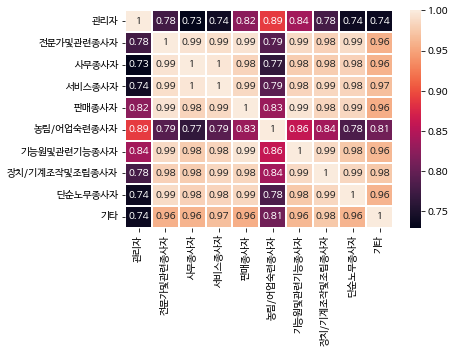

In [ ]:
corr = X_train.corr()
sns.heatmap(corr,
            annot = True,
            linewidth = 1,
            cbar = True ) 
# 상관관계가 너무 높다...
# 비율로 바꾸면?

In [ ]:
job_pop_total

,년도,행정구역별(읍면동),65세이상총인구,2039여성,인구성장잠재력지수,성별,계,관리자,전문가및관련종사자,사무종사자,서비스종사자,판매종사자,농림/어업숙련종사자,기능원및관련기능종사자,장치/기계조작및조립종사자,단순노무종사자,기타
0,2010,전국,5424667,7034058,1.296680,합계,22200398,624124,4305234,3607845,2209667,2697442,1675586,1959586,2707684,2328485,79433
3,2010,서울특별시,928956,1652207,1.778563,합계,4609336,192621,1166525,929604,480995,658545,11299,388647,303590,467694,7631
6,2010,부산광역시,397130,478247,1.204258,합계,1463388,37096,265457,243933,165193,215451,15980,154127,199170,164827,2027
9,2010,대구광역시,251516,348479,1.385514,합계,1035609,26888,201822,156237,107427,148906,19712,101808,155073,113675,4002
12,2010,인천광역시,232199,397811,1.713233,합계,1211291,26728,221076,210725,122382,157965,20333,123404,192474,133336,2772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2000,전라북도,211579,279706,1.321993,합계,763276,27269,89539,76055,63526,82789,241940,58310,75063,48094,637
243,2000,전라남도,270708,261679,0.966647,합계,924576,25204,74295,72136,66051,83326,424141,63346,64754,49450,1870
246,2000,경상북도,314068,407589,1.297773,합계,1202476,30324,119025,114735,102663,108286,410510,87635,157795,69289,2201
249,2000,경상남도,267459,479998,1.794660,합계,1244691,52148,150317,136844,110442,129010,297174,119890,156873,84493,7456


In [ ]:
for i in X_train.columns:
  print(i)
  job_pop_total[i + '비율'] = job_pop_total[i]/job_pop_total['계']
job_pop_total

관리자
전문가및관련종사자
사무종사자
서비스종사자
판매종사자
농림/어업숙련종사자
기능원및관련기능종사자
장치/기계조작및조립종사자
단순노무종사자
기타


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,년도,행정구역별(읍면동),65세이상총인구,2039여성,인구성장잠재력지수,성별,계,관리자,전문가및관련종사자,사무종사자,...,관리자비율,전문가및관련종사자비율,사무종사자비율,서비스종사자비율,판매종사자비율,농림/어업숙련종사자비율,기능원및관련기능종사자비율,장치/기계조작및조립종사자비율,단순노무종사자비율,기타비율
0,2010,전국,5424667,7034058,1.296680,합계,22200398,624124,4305234,3607845,...,0.028113,0.193926,0.162513,0.099533,0.121504,0.075475,0.088268,0.121966,0.104885,0.003578
3,2010,서울특별시,928956,1652207,1.778563,합계,4609336,192621,1166525,929604,...,0.041789,0.253079,0.201679,0.104352,0.142872,0.002451,0.084317,0.065864,0.101467,0.001656
6,2010,부산광역시,397130,478247,1.204258,합계,1463388,37096,265457,243933,...,0.025349,0.181399,0.166691,0.112884,0.147228,0.010920,0.105322,0.136102,0.112634,0.001385
9,2010,대구광역시,251516,348479,1.385514,합계,1035609,26888,201822,156237,...,0.025963,0.194882,0.150865,0.103733,0.143786,0.019034,0.098307,0.149741,0.109766,0.003864
12,2010,인천광역시,232199,397811,1.713233,합계,1211291,26728,221076,210725,...,0.022066,0.182513,0.173967,0.101034,0.130410,0.016786,0.101878,0.158900,0.110078,0.002288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2000,전라북도,211579,279706,1.321993,합계,763276,27269,89539,76055,...,0.035726,0.117309,0.099643,0.083228,0.108465,0.316976,0.076394,0.098343,0.063010,0.000835
243,2000,전라남도,270708,261679,0.966647,합계,924576,25204,74295,72136,...,0.027260,0.080356,0.078021,0.071439,0.090123,0.458741,0.068514,0.070036,0.053484,0.002023
246,2000,경상북도,314068,407589,1.297773,합계,1202476,30324,119025,114735,...,0.025218,0.098983,0.095416,0.085376,0.090053,0.341387,0.072879,0.131225,0.057622,0.001830
249,2000,경상남도,267459,479998,1.794660,합계,1244691,52148,150317,136844,...,0.041896,0.120767,0.109942,0.088730,0.103648,0.238753,0.096321,0.126034,0.067883,0.005990


In [ ]:
X_train = job_pop_total.iloc[:, -10:]
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              인구성장잠재력지수   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              169.3
Date:                Fri, 13 May 2022   Prob (F-statistic):                    3.10e-47
Time:                        09:25:32   Log-Likelihood:                         -29.325
No. Observations:                  85   AIC:                                      78.65
Df Residuals:                      75   BIC:                                      103.1
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
관리자비율              29.7677      4.389      6.782      0.000      21.024      38.511
전문가및관련종사자비율         4.5975      2.180      2.109      0.038       0.256       8.939
사무종사자비율            -6.0984      2.805     -2.174      0.033     -11.685      -0.511
서비스종사자비율            3.4889      2.925      1.193      0.237      -2.337       9.315
판매종사자비율             0.3269      3.492      0.094      0.926      -6.629       7.283
농림/어업숙련종사자비율       -1.1461      0.396     -2.894      0.005      -1.935      -0.357
기능원및관련기능종사자비율      13.7778      3.091      4.457      0.000       7.620      19.935
장치/기계조작및조립종사자비율     0.1625      1.374      0.118      0.906      -2.575       2.900
단순노무종사자비율          -8.1461      2.440     -3.338      0.001     -13.007      -3.285
기타비율               -1.8579      8.956     -0.207      0.836     -19.700      15.984
==============================================================================
Omnibus:                       46.704   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.617
Skew:                           1.569   Prob(JB):                     5.63e-53
Kurtosis:                      10.622   Cond. No.                         82.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

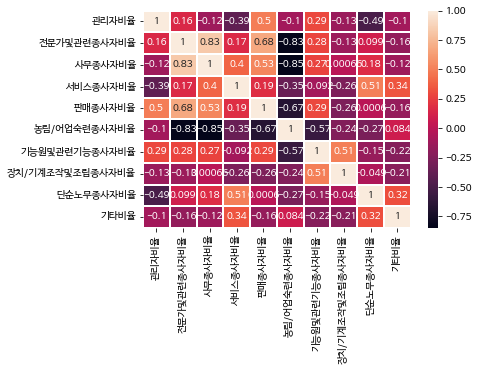

In [ ]:
corr = X_train.corr()
sns.heatmap(corr,
            annot = True,
            linewidth = 1,
            cbar = True ) 